# Exploring the Heliosphere with Python

This notebook demonstrates loading and plotting science data in the Heliosphere using SunPy and PySPEDAS. 

**By Eric Grimes, UCLA - Earth, Planetary, and Space Sciences; egrimes(at)igpp.ucla.edu**

This notebook is available online at:

https://colab.research.google.com/drive/1k-u-l55EeRiHTNv83qZwz0-KoyHcUnBC?usp=sharing

Notes:
- I tried to start with the Sun, and go all the way to the ground; so solar data are first and ground data are last
- For the most part, the data shown are from March 27, 2017; exceptions are Parker Solar Probe and Solar Orbiter (which had not launched yet, so more recent examples are used).
- Only a few data products are loaded/plotted for each spacecraft in this notebook, so not all spacecraft/instruments/data products are demonstrated. For a list of the full capabilities, please see the documentation:

PySPEDAS: https://pyspedas.readthedocs.io/

SunPy: https://sunpy.org/

- The SunPy examples were taken from the SunPy examples gallery, with minor changes for our event
- Other Python in Heliophysics Community (PyHC) projects used in this notebook:

cdflib: https://cdflib.readthedocs.io/

PyTplot: https://pytplot.readthedocs.io/

Geopack: https://github.com/tsssss/geopack

In [ ]:
!pip install https://github.com/MAVENSDC/PyTplot/archive/matplotlib-backend.zip
!pip install https://github.com/spedas/pyspedas/archive/master.zip
#!pip install pyspedas
!pip install sunpy
!pip install zeep # required by SunPy
!pip install drms # also required by SunPy

## Solar and Heliospheric Observatory satellite (SOHO)



Create a figure of LASCO C2 data

In [ ]:
import os

import matplotlib.pyplot as plt

import astropy.time
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.visualization import ImageNormalize, SqrtStretch

import sunpy.map
from sunpy.net import Fido
from sunpy.net import attrs as a

timerange = a.Time('2017/03/27 06:00', '2017/03/27 06:01')
instrument = a.Instrument.lasco
detector = a.Detector.c2
result = Fido.search(timerange, instrument, detector)
downloaded_files = Fido.fetch(result)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

 [astropy.io.fits.verify]
 [sunpy.map.mapbase]


INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


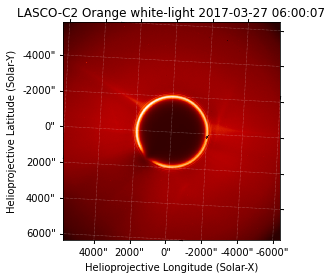

In [ ]:
lascomap = sunpy.map.Map(downloaded_files[0])
fig = plt.figure()
lascomap.plot()

plt.show()

## Solar Dynamics Observatory (SDO) 

Create an HMI magnetogram

In [ ]:
result = Fido.search(a.Time('2017/03/27 06:00', '2017/03/27 06:01'),
                     a.Instrument.hmi, a.Physobs.los_magnetic_field)
downloaded_file = Fido.fetch(result)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

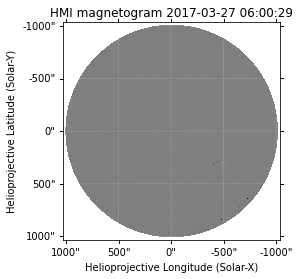

In [ ]:
hmi_map = sunpy.map.Map(downloaded_file[0])
fig = plt.figure()
hmi_map.plot()

plt.show()

Create an image from Atmospheric Imaging Assembly (AIA)

In [ ]:
t0 = astropy.time.Time('2017-03-27T06:00:01', scale='utc', format='isot')
q = Fido.search(
    a.Instrument.aia,
    a.Physobs.intensity,
    a.Wavelength(171*u.angstrom),
    a.Time(t0, t0 + 13*u.s),
)
m = sunpy.map.Map(Fido.fetch(q))

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

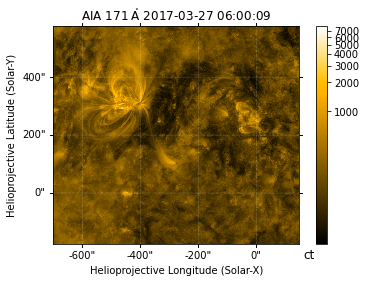

In [ ]:
m_cutout = m.submap(
    SkyCoord(-700*u.arcsec, -175*u.arcsec, frame=m.coordinate_frame),
    top_right=SkyCoord(150*u.arcsec, 575*u.arcsec, frame=m.coordinate_frame),
)
m_cutout.peek()

## Parker Solar Probe

In [ ]:
import pyspedas

time_range = ['2019-04-03', '2019-04-03/12:00']

pyspedas.psp.fields(datatype='mag_rtn_4_sa_per_cyc',
                    trange=time_range,
                    time_clip=True)
pyspedas.psp.fields(datatype='rfs_hfr',
                    varnames='psp_fld_l2_rfs_hfr_auto_averages_ch0_V1V2',
                    trange=time_range,
                    time_clip=True)
pyspedas.psp.fields(datatype='rfs_lfr',
                    varnames='psp_fld_l2_rfs_lfr_auto_averages_ch0_V1V2',
                    trange=time_range,
                    time_clip=True)

02-Feb-22 23:22:55: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn_4_per_cycle/2019/
02-Feb-22 23:22:55: File is current: psp_data/fields/l2/mag_rtn_4_per_cycle/2019/psp_fld_l2_mag_rtn_4_sa_per_cyc_20190403_v02.cdf
02-Feb-22 23:22:57: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/rfs_hfr/2019/


Time clip was applied to: psp_fld_l2_mag_RTN_4_Sa_per_Cyc


02-Feb-22 23:22:58: File is current: psp_data/fields/l2/rfs_hfr/2019/psp_fld_l2_rfs_hfr_20190403_v02.cdf
02-Feb-22 23:22:59: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/rfs_lfr/2019/


Time clip was applied to: psp_fld_l2_rfs_hfr_auto_averages_ch0_V1V2


02-Feb-22 23:22:59: File is current: psp_data/fields/l2/rfs_lfr/2019/psp_fld_l2_rfs_lfr_20190403_v02.cdf


Time clip was applied to: psp_fld_l2_rfs_lfr_auto_averages_ch0_V1V2


['psp_fld_l2_rfs_lfr_auto_averages_ch0_V1V2']

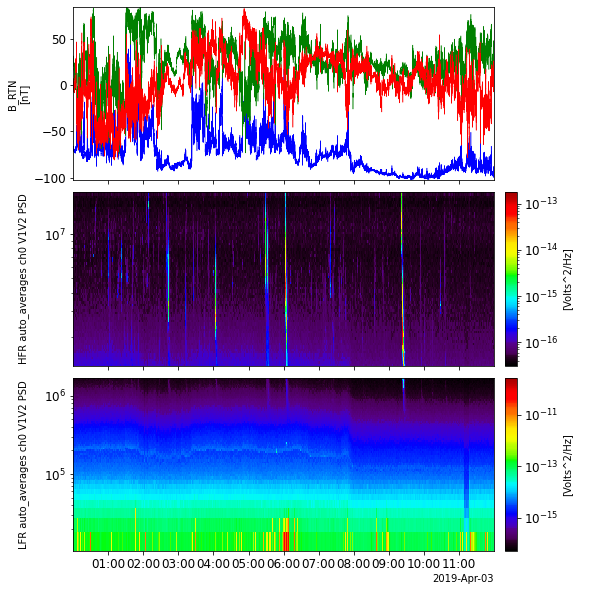

In [ ]:
from pytplot import tplot, options

options('psp_fld_l2_rfs_hfr_auto_averages_ch0_V1V2', 'ylog', True)
options('psp_fld_l2_rfs_hfr_auto_averages_ch0_V1V2', 'zlog', True)
options('psp_fld_l2_rfs_lfr_auto_averages_ch0_V1V2', 'ylog', True)
options('psp_fld_l2_rfs_lfr_auto_averages_ch0_V1V2', 'zlog', True)

tplot(['psp_fld_l2_mag_RTN_4_Sa_per_Cyc',
       'psp_fld_l2_rfs_hfr_auto_averages_ch0_V1V2',
       'psp_fld_l2_rfs_lfr_auto_averages_ch0_V1V2'])

## Solar Orbiter

In [ ]:
pyspedas.solo.mag(trange=['2020-04-20/06:00', '2020-04-20/08:00'], 
                  time_clip=True)

02-Feb-22 23:23:08: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/solar-orbiter/mag/science/l2/rtn-normal/2020/
02-Feb-22 23:23:08: File is current: solar_orbiter_data/mag/science/l2/rtn-normal/2020/solo_l2_mag-rtn-normal_20200420_v01.cdf


Time clip was applied to: B_RTN


['B_RTN']

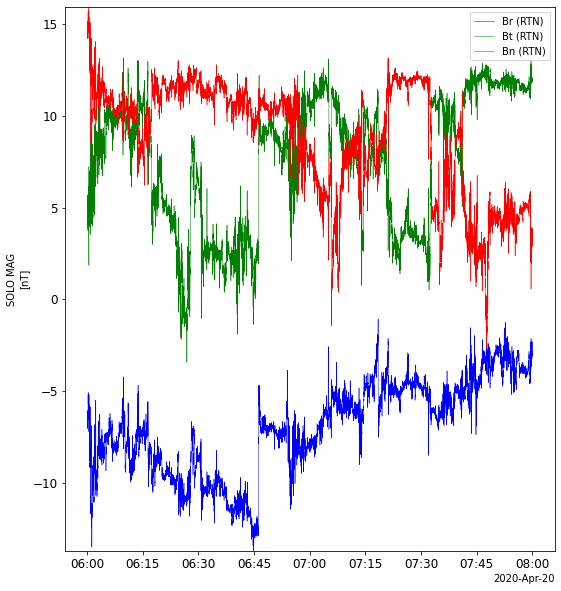

In [ ]:
tplot('B_RTN')

## Advanced Composition Explorer (ACE)

In [ ]:
trange = ['2017-03-27', '2017-03-28']

In [ ]:
mfi_vars = pyspedas.ace.mfi(trange=trange)
swe_vars = pyspedas.ace.swe(trange=trange)

02-Feb-22 23:23:11: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/ace/mag/level_2_cdaweb/mfi_h3/2017/
02-Feb-22 23:23:11: File is current: ace_data/mag/level_2_cdaweb/mfi_h3/2017/ac_h3_mfi_20170327_v02.cdf
02-Feb-22 23:23:11: /usr/local/lib/python3.7/dist-packages/erfa/core.py:155: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  ErfaWarning)

02-Feb-22 23:23:12: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/ace/swepam/level_2_cdaweb/swe_h0/2017/
02-Feb-22 23:23:12: File is current: ace_data/swepam/level_2_cdaweb/swe_h0/2017/ac_h0_swe_20170327_v11.cdf


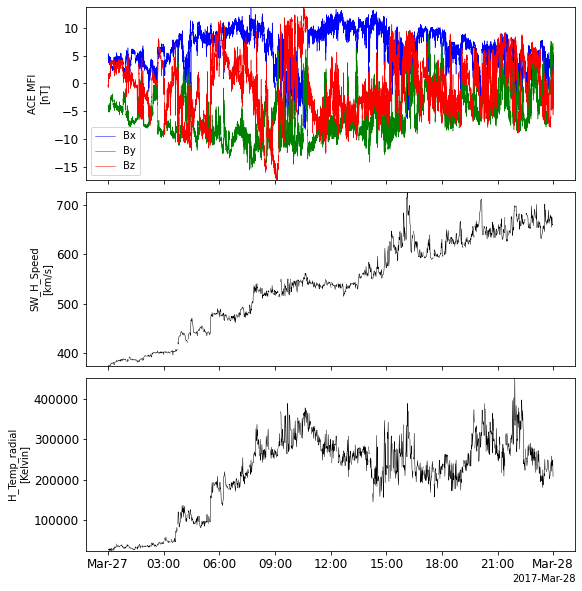

In [ ]:
tplot(['BGSEc', 'Vp', 'Tpr'])

## Deep Space Climate Observatory (DSCOVR)

In [ ]:
mag_vars = pyspedas.dscovr.mag(trange=trange)
orb_vars = pyspedas.dscovr.orb(trange=trange)

02-Feb-22 23:23:15: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/dscovr/h0/mag/2017/
02-Feb-22 23:23:15: File is current: dscovr_data/h0/mag/2017/dscovr_h0_mag_20170327_v01.cdf
02-Feb-22 23:23:16: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/dscovr/orbit/pre_or/2017/
02-Feb-22 23:23:16: File is current: dscovr_data/orbit/pre_or/2017/dscovr_orbit_pre_20170327_v06.cdf


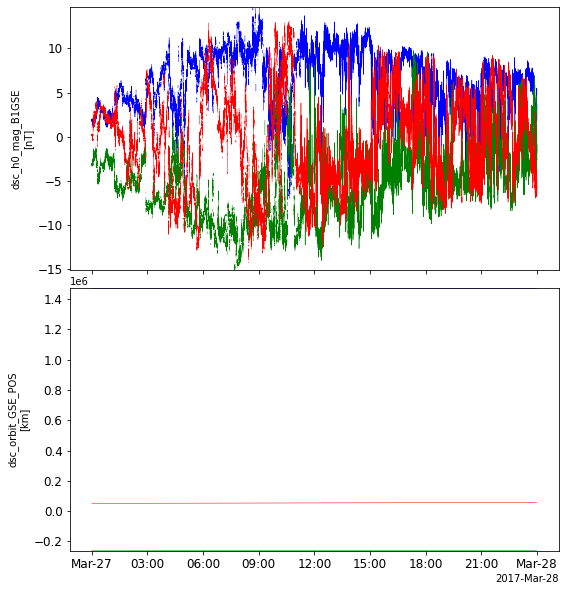

In [ ]:
tplot(['dsc_h0_mag_B1GSE', 'dsc_orbit_GSE_POS'])

## Solar Terrestrial Relations Observatory (STEREO)

In [ ]:
mag_vars = pyspedas.stereo.mag(trange=trange)
plastic_vars = pyspedas.stereo.plastic(trange=trange)

02-Feb-22 23:23:18: Downloading remote index: http://sprg.ssl.berkeley.edu/data/misc/stereo/impact/level1/ahead/mag/RTN/2017/03/
02-Feb-22 23:23:18: File is current: stereo_data/impact/level1/ahead/mag/RTN/2017/03/STA_L1_MAG_RTN_20170327_V06.cdf
02-Feb-22 23:23:19: Downloading remote index: http://stereo-ssc.nascom.nasa.gov/data/ins_data/plastic/level2/Protons/Derived_from_1D_Maxwellian/ahead/1min/2017/
02-Feb-22 23:23:20: File is current: stereo_data/plastic/level2/Protons/Derived_from_1D_Maxwellian/ahead/1min/2017/STA_L2_PLA_1DMax_1min_20170327_V11.cdf


The lengths of x and y do not match!
proton_n_s_flow_angle_HERTN is currently not in pytplot.
proton_n_s_flow_angle_HERTN is currently not in pytplot.
proton_n_s_flow_angle_HERTN is currently not in pytplot.


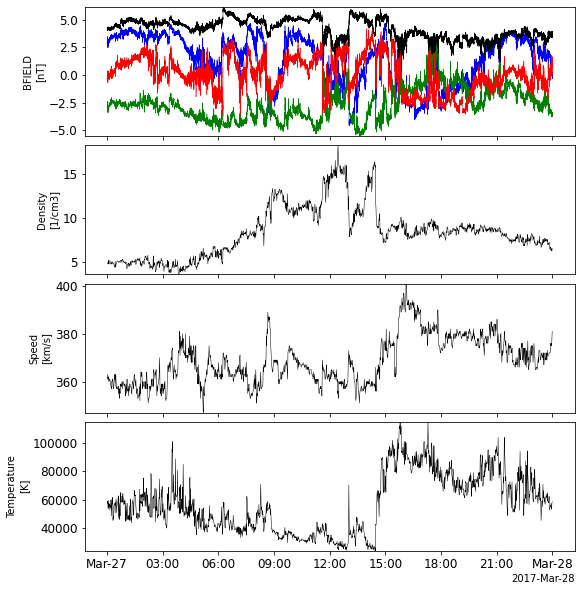

In [ ]:
tplot(['BFIELD', 'proton_number_density', 'proton_bulk_speed', 'proton_temperature'])

## Mars Atmosphere and Volatile Evolution (MAVEN)



In [ ]:
mag_vars = pyspedas.maven.mag(trange=trange)
swe_vars = pyspedas.maven.swea(trange=trange)
swi_vars = pyspedas.maven.swia(trange=trange)

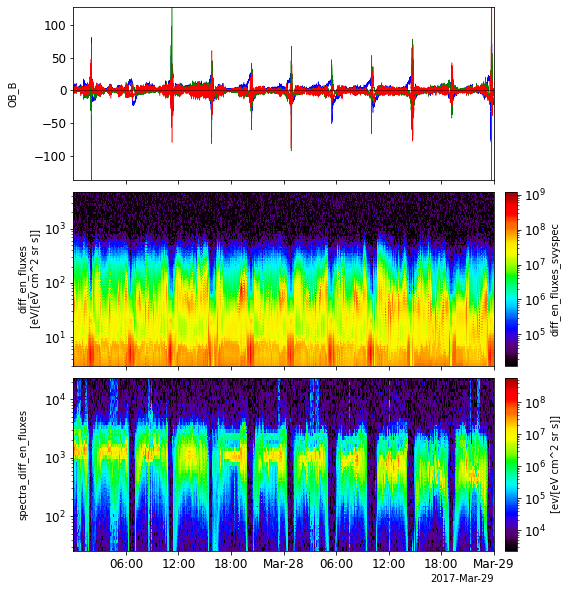

In [ ]:
options('spectra_diff_en_fluxes_onboardsvyspec', 'ylog', True)
options('spectra_diff_en_fluxes_onboardsvyspec', 'zlog', True)
options('diff_en_fluxes_svyspec', 'ylog', True)
options('diff_en_fluxes_svyspec', 'zlog', True)

tplot(['OB_B', 'diff_en_fluxes_svyspec', 'spectra_diff_en_fluxes_onboardsvyspec'])

## OMNI 

In [ ]:
omni_vars = pyspedas.omni.data(trange=['2017-03-01', '2017-04-01'], time_clip=False)

02-Feb-22 23:28:31: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/omni/omni_cdaweb/hro2_1min/2017/
02-Feb-22 23:28:31: File is current: omni_data/hro2_1min/2017/omni_hro2_1min_20170301_v01.cdf


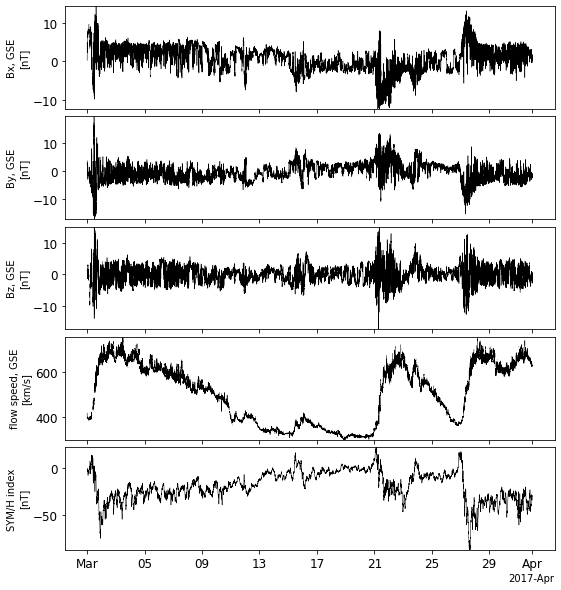

In [ ]:
tplot(['BX_GSE', 'BY_GSE', 'BZ_GSE', 'flow_speed', 'SYM_H'])

## Kyoto Dst

In [ ]:
dst_vars = pyspedas.kyoto.dst(trange=['2017-03-01', '2017-04-01'])

Time clip returns full data set.
**************************************************************************************
The DST data are provided by the World Data Center for Geomagnetism, Kyoto, and
 are not for redistribution (http://wdc.kugi.kyoto-u.ac.jp/). Furthermore, we thank
 the geomagnetic observatories (Kakioka [JMA], Honolulu and San Juan [USGS], Hermanus
 [RSA], Alibag [IIG]), NiCT, INTERMAGNET, and many others for their cooperation to
 make the Dst index available.
**************************************************************************************


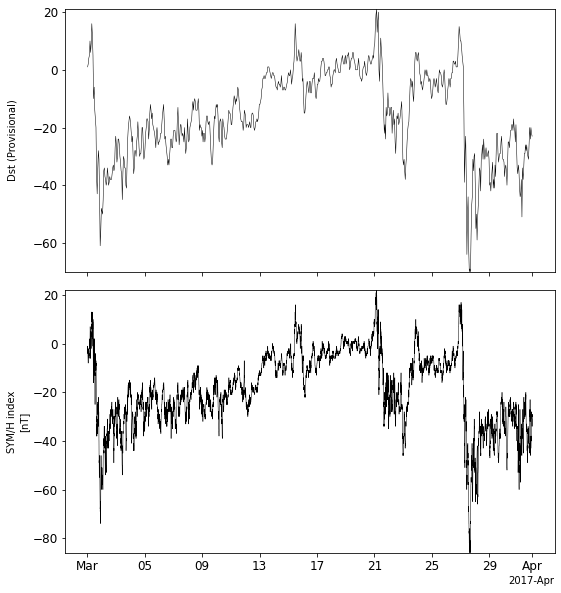

In [ ]:
tplot(['kyoto_dst', 'SYM_H'])

## Geotail

The Geotail mission's primary objective is to study the dynamics of the Earth's magnetotail over a wide range of distance, extending from the near-Earth region to the distant tail.

In [ ]:
mgf_vars = pyspedas.geotail.mgf(trange=trange)
cpi_vars = pyspedas.geotail.cpi(trange=trange)

02-Feb-22 23:28:38: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/geotail/mgf/mgf_k0/2017/
02-Feb-22 23:28:38: File is current: geotail_data/mgf/mgf_k0/2017/ge_k0_mgf_20170327_v01.cdf
02-Feb-22 23:28:38: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/geotail/cpi/cpi_k0/2017/
02-Feb-22 23:28:38: File is current: geotail_data/cpi/cpi_k0/2017/ge_k0_cpi_20170327_v01.cdf


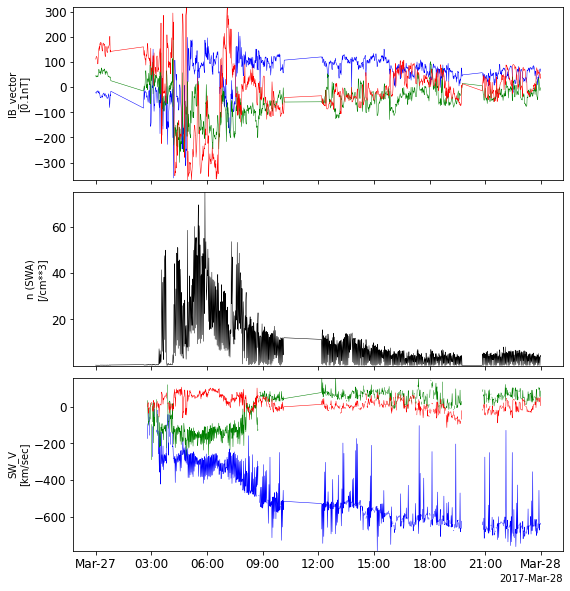

In [ ]:
tplot(['IB_vector', 'SW_P_Den', 'SW_V'])

## Magnetospheric Multiscale (MMS)

The MMS mission studies the mystery of how magnetic fields around Earth connect and disconnect, explosively releasing energy via a process known a magnetic reconnection.

In [ ]:
mec_vars = pyspedas.mms.mec(trange=trange)
fgm_vars = pyspedas.mms.fgm(trange=trange)
feeps_vars = pyspedas.mms.feeps(trange=trange)

02-Feb-22 23:42:26: Downloading mms1_mec_srvy_l2_epht89q_20170327_v2.0.3.cdf to pydata/mms1/mec/srvy/l2/epht89q/2017/03


Loaded variables:
mms1_mec_dipole_tilt
mms1_mec_gmst
mms1_mec_mlat
mms1_mec_mlt
mms1_mec_l_dipole
mms1_mec_quat_eci_to_bcs
mms1_mec_quat_eci_to_dbcs
mms1_mec_quat_eci_to_dmpa
mms1_mec_quat_eci_to_smpa
mms1_mec_quat_eci_to_dsl
mms1_mec_quat_eci_to_ssl
mms1_mec_L_vec
mms1_mec_Z_vec
mms1_mec_P_vec
mms1_mec_L_phase
mms1_mec_Z_phase
mms1_mec_P_phase
mms1_mec_kp
mms1_mec_dst
mms1_mec_earth_eclipse_flag
mms1_mec_moon_eclipse_flag
mms1_mec_r_eci
mms1_mec_v_eci
mms1_mec_r_gsm
mms1_mec_v_gsm
mms1_mec_quat_eci_to_gsm
mms1_mec_r_geo
mms1_mec_v_geo
mms1_mec_quat_eci_to_geo
mms1_mec_r_sm
mms1_mec_v_sm
mms1_mec_quat_eci_to_sm
mms1_mec_r_gse
mms1_mec_v_gse
mms1_mec_quat_eci_to_gse
mms1_mec_r_gse2000
mms1_mec_v_gse2000
mms1_mec_quat_eci_to_gse2000
mms1_mec_geod_lat
mms1_mec_geod_lon
mms1_mec_geod_height
mms1_mec_r_sun_de421_eci
mms1_mec_r_moon_de421_eci
mms1_mec_fieldline_type
mms1_mec_bsc_gsm
mms1_mec_loss_cone_angle_s
mms1_mec_loss_cone_angle_n
mms1_mec_pfs_geod_latlon
mms1_mec_pfn_geod_latlon
mms1_m

02-Feb-22 23:42:30: Loading pydata/mms1/fgm/srvy/l2/2017/03/mms1_fgm_srvy_l2_20170327_v5.89.0.cdf


That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1_fgm_rdeltahalf_srvy_l2
mms1_fgm_b_dmpa_srvy_l2_bvec
mms1_fgm_b_dmpa_srvy_l2_btot
mms1_fgm_b_gse_srvy_l2_bvec
mms1_fgm_b_gse_srvy_l2_btot
mms1_fgm_b_gsm_srvy_l2_bvec
mms1_fgm_b_gsm_srvy_l2_btot
mms1_fgm_b_bcs_srvy_l2_bvec
mms1_fgm_b_bcs_srvy_l2_btot


02-Feb-22 23:42:48: Loading pydata/mms1/feeps/srvy/l2/electron/2017/03/mms1_feeps_srvy_l2_electron_20170327000000_v6.1.2.cdf


mms1_epd_feeps_srvy_l2_electron_top_intensity_sensorid_1 contains negative values; setting the z-axis to log scale will cause the negative values to be ignored on figures.
mms1_epd_feeps_srvy_l2_electron_top_intensity_sensorid_2 contains negative values; setting the z-axis to log scale will cause the negative values to be ignored on figures.
mms1_epd_feeps_srvy_l2_electron_top_intensity_sensorid_9 contains negative values; setting the z-axis to log scale will cause the negative values to be ignored on figures.
mms1_epd_feeps_srvy_l2_electron_top_intensity_sensorid_10 contains negative values; setting the z-axis to log scale will cause the negative values to be ignored on figures.
mms1_epd_feeps_srvy_l2_electron_bottom_intensity_sensorid_1 contains negative values; setting the z-axis to log scale will cause the negative values to be ignored on figures.
mms1_epd_feeps_srvy_l2_electron_bottom_intensity_sensorid_2 contains negative values; setting the z-axis to log scale will cause the neg

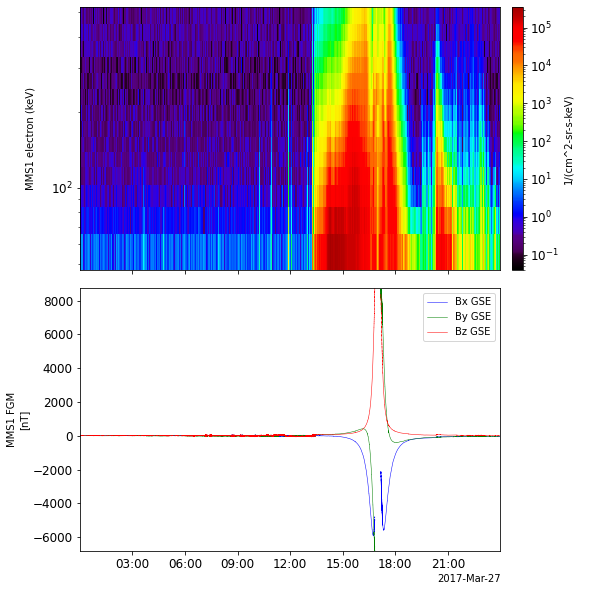

In [ ]:
tplot(['mms1_epd_feeps_srvy_l2_electron_intensity_omni',
       'mms1_fgm_b_gse_srvy_l2_bvec'])

## Time History of Events and Macroscale Interactions during Substorms (THEMIS)

THEMIS studies how mass and energy move through the near-Earth space environment to determine the physical processes initiating auroras

In [ ]:
sta_vars = pyspedas.themis.state(probe='d', trange=trange)
fgm_vars = pyspedas.themis.fgm(probe='d', trange=trange)
gmom_vars = pyspedas.themis.gmom(probe='d', trange=trange)

02-Feb-22 23:43:00: Downloading http://themis.ssl.berkeley.edu/data/themis/thd/l1/state/2017/thd_l1_state_20170327.cdf to themis_data/thd/l1/state/2017/thd_l1_state_20170327.cdf
02-Feb-22 23:43:01: Download complete: themis_data/thd/l1/state/2017/thd_l1_state_20170327.cdf
02-Feb-22 23:43:03: Downloading remote index: http://themis.ssl.berkeley.edu/data/themis/thd/l2/fgm/2017/
02-Feb-22 23:43:04: File is current: themis_data/thd/l2/fgm/2017/thd_l2_fgm_20170327_v01.cdf
02-Feb-22 23:43:13: Downloading remote index: http://themis.ssl.berkeley.edu/data/themis/thd/l2/gmom/2017/
02-Feb-22 23:43:14: File is current: themis_data/thd/l2/gmom/2017/thd_l2_gmom_20170327_v01.cdf


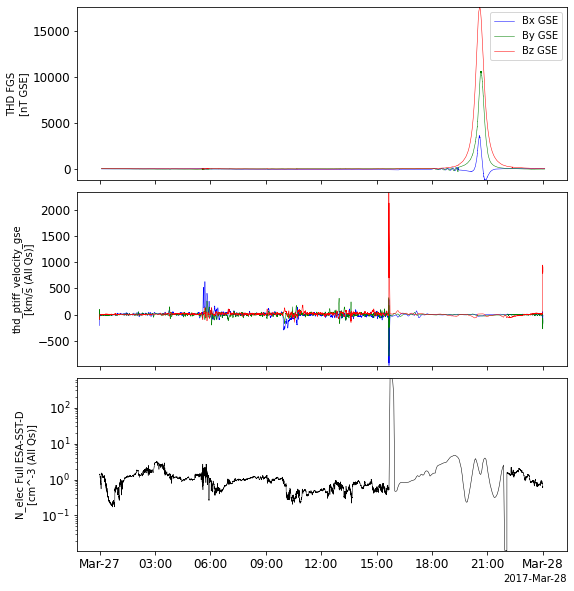

In [ ]:
tplot(['thd_fgs_gse', 'thd_ptiff_velocity_gse', 'thd_pteff_density'])

## Van Allen Probes

This mission (formerly known as Radiation Belt Storm Probes(RBSP)) was designed to help us understand the Sun’s influence on Earth and Near-Earth space by studying the Earth’s radiation belts on various scales of space and time.

In [ ]:
emfisis_vars = pyspedas.rbsp.emfisis(trange=['2017-03-27/15:00', '2017-03-27/16:00'], 
                                     datatype='magnetometer', 
                                     level='l3', 
                                     time_clip=True)
efw_vars = pyspedas.rbsp.efw(trange=['2017-03-27/15:00', '2017-03-27/16:00'], 
                             level='l3',
                             time_clip=True)

02-Feb-22 23:30:28: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/rbsp/rbspa/l3/emfisis/magnetometer/4sec/sm/2017/
02-Feb-22 23:30:29: File is current: rbsp_data/rbspa/l3/emfisis/magnetometer/4sec/sm/2017/rbsp-a_magnetometer_4sec-sm_emfisis-l3_20170327_v1.7.2.cdf
02-Feb-22 23:30:29: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/rbsp/rbspa/l3/efw/2017/


Time clip was applied to: Mag
Time clip was applied to: Magnitude
Time clip was applied to: delta
Time clip was applied to: lambda
Time clip was applied to: rms
Time clip was applied to: coordinates


02-Feb-22 23:30:29: File is current: rbsp_data/rbspa/l3/efw/2017/rbspa_efw-l3_20170327_v04.cdf
02-Feb-22 23:30:29: /usr/local/lib/python3.7/dist-packages/erfa/core.py:155: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  ErfaWarning)



Time clip was applied to: VxB_efield_of_earth_mgse
Time clip was applied to: efield_in_inertial_frame_spinfit_mgse
Time clip was applied to: efield_in_corotation_frame_spinfit_mgse
Time clip was applied to: efield_in_inertial_frame_spinfit_edotb_mgse
Time clip was applied to: efield_in_corotation_frame_spinfit_edotb_mgse
Time clip was applied to: spacecraft_potential
Time clip was applied to: density
Time clip was applied to: VscxB_motional_efield_mgse
Time clip was applied to: velocity_gse
Time clip was applied to: position_gse
Time clip was applied to: angle_spinplane_Bo
Time clip was applied to: mlt
Time clip was applied to: mlat
Time clip was applied to: lshell
Time clip was applied to: spinaxis_gse
Time clip was applied to: global_flag
Time clip was applied to: flags_all
Time clip was applied to: bias_current
Time clip was applied to: flags_charging_bias_eclipse
Time clip was applied to: burst1_avail
Time clip was applied to: burst2_avail
Time clip returns empty data.


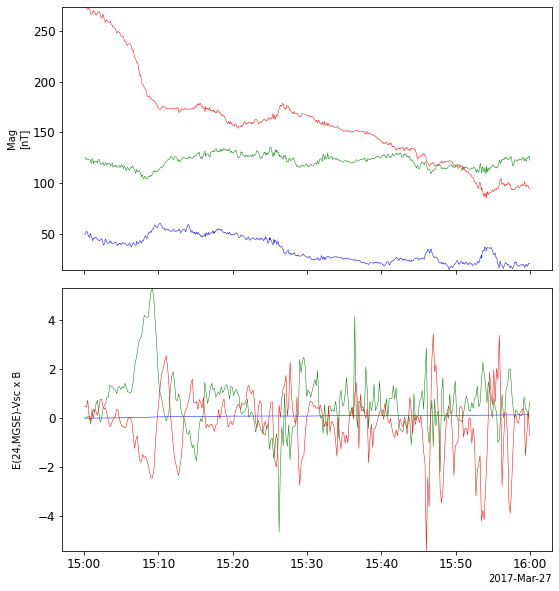

In [ ]:
tplot(['Mag', 'efield_in_inertial_frame_spinfit_mgse'])

## Arase



In [ ]:
pyspedas.erg.orb(trange=trange)
pyspedas.erg.mgf(trange=trange)
pyspedas.erg.mepe(trange=trange)
pyspedas.erg.lepe(trange=trange)

02-Feb-22 23:42:17: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/orb/def/2017/
02-Feb-22 23:42:19: Downloading https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/orb/def/2017/erg_orb_l2_20170327_v03.cdf to erg_data/satellite/erg/orb/def/2017/erg_orb_l2_20170327_v03.cdf
02-Feb-22 23:42:20: Download complete: erg_data/satellite/erg/orb/def/2017/erg_orb_l2_20170327_v03.cdf
02-Feb-22 23:42:20: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2017/03/


 
**************************************************************************
printing PI info and rules of the road was failed


02-Feb-22 23:42:21: File is current: erg_data/satellite/erg/mgf/l2/8sec/2017/03/erg_mgf_l2_8sec_20170327_v03.04.cdf
02-Feb-22 23:42:21: /usr/local/lib/python3.7/dist-packages/pytplot/importers/cdf_to_tplot.py:250: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

02-Feb-22 23:42:21: /usr/local/lib/python3.7/dist-packages/pytplot/importers/cdf_to_tplot.py:256: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ydata[ydata == var_atts["FILLVAL"]] = 0

02-Feb-22 23:42:22: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mepe/l2/omniflux/2017/03/


 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data

Information about ERG MGF

PI:  Ayako Matsuoka
Affiliation: Data Analysis Center for Geomagnetism and Space Magnetism, Graduate School of Science, Kyoto University, Kitashirakawa-Oiwake Cho, Sakyo-ku Kyoto 606-8502, Japan

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of MGF L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mgf
Contact: erg_mgf_info at isee.nagoya-u.ac.jp
**************************************************************************


02-Feb-22 23:42:23: File is current: erg_data/satellite/erg/mepe/l2/omniflux/2017/03/erg_mepe_l2_omniflux_20170327_v01_02.cdf
02-Feb-22 23:42:23: /usr/local/lib/python3.7/dist-packages/pytplot/importers/cdf_to_tplot.py:250: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

02-Feb-22 23:42:23: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/lepe/l2/omniflux/2017/03/


 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Medium Energy Particle experiments - electron analyzer (MEP-e) electron omni flux data

PI:  Satoshi Kasahara
Affiliation: The University of Tokyo

- The rules of the road (RoR) common to the ERG project:
      https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
- RoR for MEP-e data:  https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mepe

Contact: erg_mep_info at isee.nagoya-u.ac.jp
**************************************************************************


02-Feb-22 23:42:23: File is current: erg_data/satellite/erg/lepe/l2/omniflux/2017/03/erg_lepe_l2_omniflux_20170327_v03_01.cdf


 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Low-Energy Particle experiments - electron analyzer (LEP-e) Level 2 omni electron flux data

Information about ERG LEPe

PI:  Shiang-Yu Wang
Affiliation: Academia Sinica, Taiwan

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of LEPe L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Lepe

Contact: erg_lepe_info at isee.nagoya-u.ac.jp
**************************************************************************


['erg_lepe_l2_omniflux_FEDO']

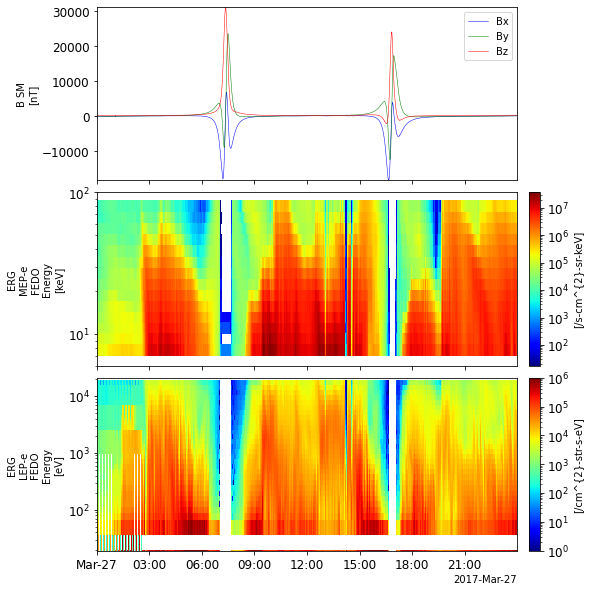

In [ ]:
tplot(['erg_mgf_l2_mag_8sec_sm', 
       'erg_mepe_l2_omniflux_FEDO', 
       'erg_lepe_l2_omniflux_FEDO'])

## Geopack (Tsyganenko field models)

In [ ]:
from pyspedas.geopack import tt89

In [ ]:
# convert the Arase position data to km (from Re)
from pyspedas import tkm2re
tkm2re('erg_orb_l2_pos_gsm', km=True)

tt89('mms1_mec_r_gsm')
tt89('thd_pos_gsm')
tt89('erg_orb_l2_pos_gsm_km')

'erg_orb_l2_pos_gsm_km_bt89'

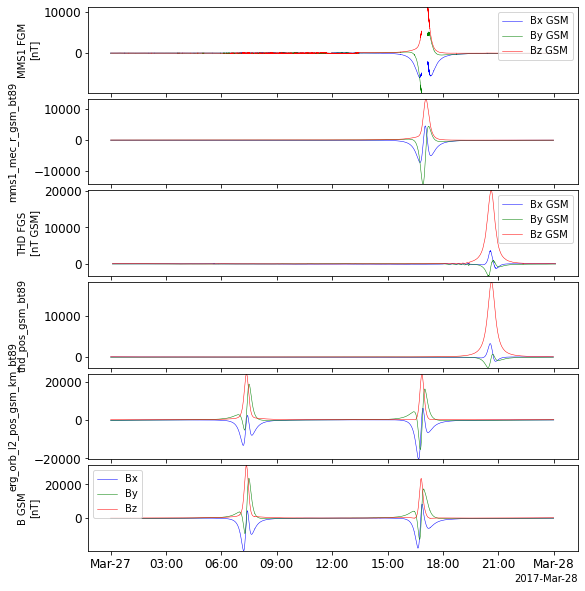

In [ ]:
tplot(['mms1_fgm_b_gsm_srvy_l2_bvec', # MMS measured field
       'mms1_mec_r_gsm_bt89', # T89 at the MMS1 position
       'thd_fgs_gsm', # THEMIS measured field
       'thd_pos_gsm_bt89', # T89 at the THEMIS-c position
       'erg_mgf_l2_mag_8sec_gsm', # ERG measured field
       'erg_orb_l2_pos_gsm_km_bt89']) # T89 at the ERG position

## Two Wide-Angle Imaging Neutral-Atom Spectrometers (TWINS)

The identical TWINS-A and TWINS-B observatories provide a new capability for stereoscopically imaging the magnetosphere

In [ ]:
lad_vars = pyspedas.twins.lad(trange=trange)
eph_vars = pyspedas.twins.ephemeris(trange=trange)

02-Feb-22 23:30:39: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/twins/twins1/lad/2017/
02-Feb-22 23:30:39: File is current: twins_data/twins1/lad/2017/twins1_l1_lad_20170327_v01.cdf
02-Feb-22 23:30:39: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/twins/twins1/ephemeris/or/2017/
02-Feb-22 23:30:39: File is current: twins_data/twins1/ephemeris/or/2017/twins1_or_def_20170327_v01.cdf


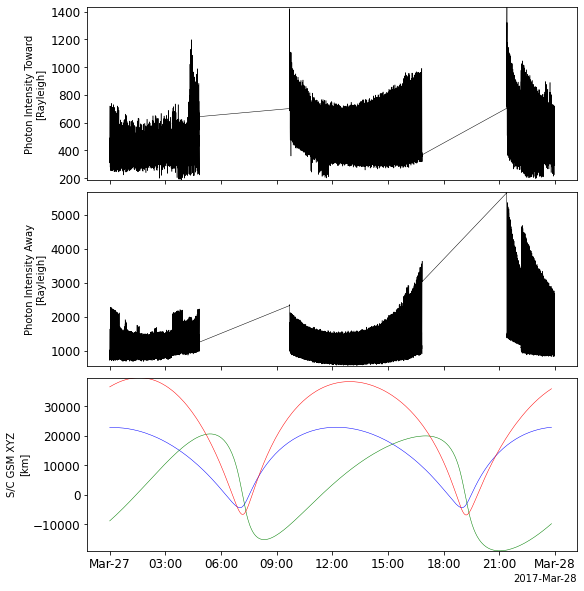

In [ ]:
tplot(['lad1_data', 'lad2_data', 'FSCGSM'])

## Polar Operational Environmental Satellites (POES)

In [ ]:
sem_vars = pyspedas.poes.sem(trange=['2017-03-27', '2017-03-28'])

02-Feb-22 23:30:41: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/noaa/noaa19/sem2_fluxes-2sec/2017/
02-Feb-22 23:30:41: File is current: poes_data/noaa19/sem2_fluxes-2sec/2017/noaa19_poes-sem2_fluxes-2sec_20170327_v01.cdf


In [ ]:
options('ted_pro_tel0_low_eflux', 'ylog', False)
options('ted_pro_tel30_low_eflux', 'ylog', False)

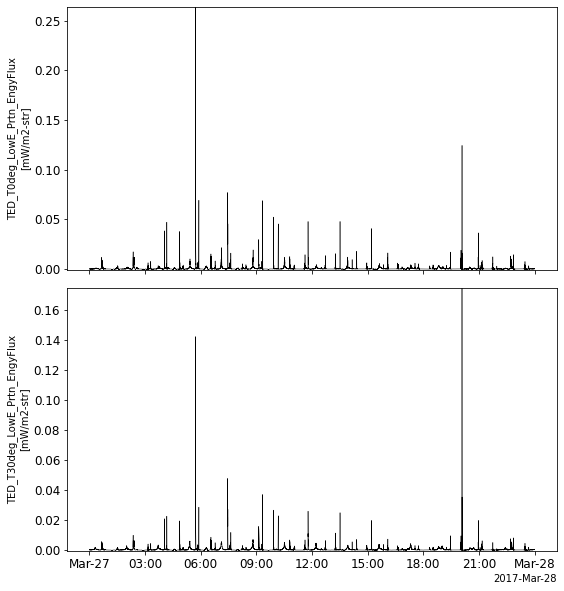

In [ ]:
from pytplot import tplot
tplot('ted_pro_tel*_low_eflux')

## Spherical Elementary Currents (SECS)

In [ ]:
!pip install basemap

In [ ]:
from pyspedas.secs.makeplots import make_plots

# set your content directory for SECS/EICS data
from pyspedas.secs.config import CONFIG
CONFIG['plots_dir'] = '/content/'

In [ ]:
pyspedas.secs.data(trange=trange, 
                   resolution=10,
                   dtype='SECS', 
                   no_download=False, 
                   downloadonly=False, 
                   out_type='df')

02-Feb-22 23:30:55: File is current: /content/SECS/2017/03/SECS20170327.zip
02-Feb-22 23:30:55: Unzipped folder: /content/SECS/2017/03/27 existed, skip unzipping  ------
02-Feb-22 23:31:41: running time of output df: --- 45.10444712638855 seconds ---


,latitude,longitude,J,datetime
0,58.30,189.70,-5564.820,20170327_000000
1,58.30,193.15,-5919.239,20170327_000000
2,58.30,196.60,-4668.270,20170327_000000
3,58.30,200.05,-2681.050,20170327_000000
4,58.30,203.50,-6654.440,20170327_000000
...,...,...,...,...
8743675,78.60,262.15,1427.663,20170327_235950
8743676,80.05,251.80,2885.517,20170327_235950
8743677,80.05,255.25,2442.346,20170327_235950
8743678,80.05,258.70,2059.269,20170327_235950


02-Feb-22 23:31:41: running time of output df: --- 0.009369373321533203 seconds ---
02-Feb-22 23:31:55: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
02-Feb-22 23:31:55: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
02-Feb-22 23:31:56: /usr/local/lib/python3.7/dist-packages/pyspedas/secs/makeplots.py:431: UserWarning: The following kwargs were not used by contour: 'tri'
  norm=norm_cb)

02-Feb-22 23:31:57: findfont: Font family ['times new roman'] not found. Falling back to DejaVu Sans.


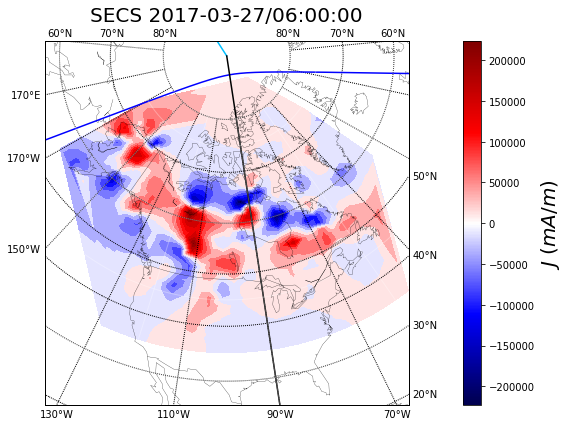

SECS plots completed!


In [ ]:
make_plots(dtype='SECS', 
           dtime='2017-03-27/06:00:00', 
           vplot_sized=True, 
           contour_den=201, 
           s_loc=False, 
           quiver_scale=30)

## Equivalent Ionospheric Currents (EICS)


In [ ]:
pyspedas.secs.data(trange=trange, 
                   resolution=10,
                   dtype='EICS', 
                   no_download=False, 
                   downloadonly=False, 
                   out_type='df')

02-Feb-22 23:32:03: File is current: /content/EICS/2017/03/EICS20170327.zip
02-Feb-22 23:32:03: Unzipped folder: /content/EICS/2017/03/27 existed, skip unzipping  ------
02-Feb-22 23:32:34: running time of output df: --- 29.520623922348022 seconds ---


,latitude,longitude,Jx,Jy,datetime
0,59.025,-161.675,-4.777,112.580,20170327_000000
1,59.025,-154.775,5.192,105.270,20170327_000000
2,59.025,-147.875,-77.049,118.370,20170327_000000
3,59.025,-140.975,-80.707,130.674,20170327_000000
4,59.025,-134.075,-14.534,123.846,20170327_000000
...,...,...,...,...,...
1581115,82.225,-71.975,113.613,-40.179,20170327_235950
1581116,82.225,-65.075,108.611,-26.874,20170327_235950
1581117,82.225,-58.175,89.797,-10.323,20170327_235950
1581118,76.425,-99.575,37.753,-30.533,20170327_235950


02-Feb-22 23:32:34: running time of output df: --- 0.006423234939575195 seconds ---
02-Feb-22 23:32:42: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
02-Feb-22 23:32:43: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


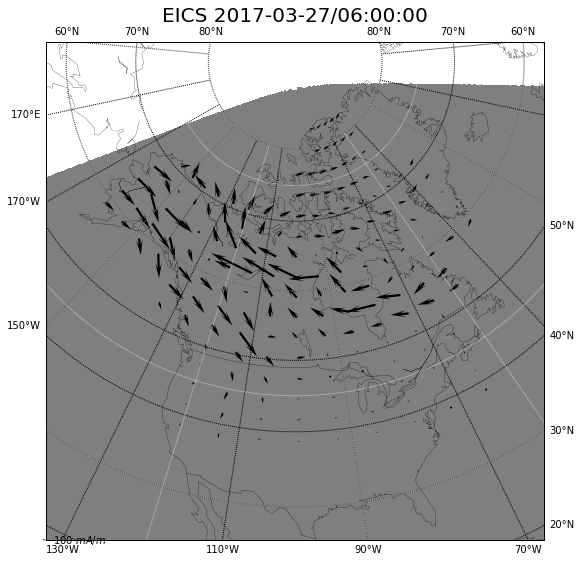

02-Feb-22 23:32:54: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
02-Feb-22 23:32:54: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
02-Feb-22 23:32:55: /usr/local/lib/python3.7/dist-packages/pyspedas/secs/makeplots.py:333: UserWarning: The following kwargs were not used by contour: 'tri'
  ctrf = m.contourf(lon, lat, Jy, contour_density, latlon=True, tri=True, cmap='jet_r', norm=norm_cb)



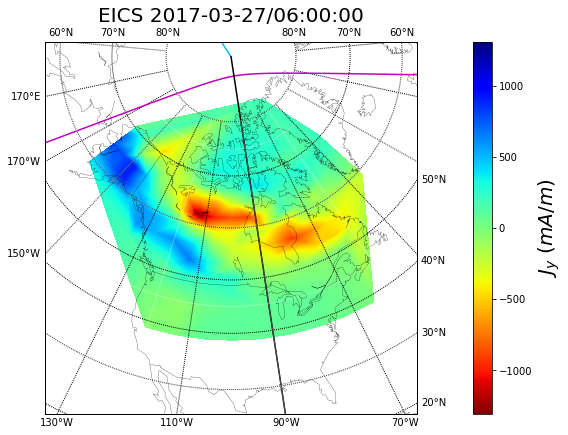

EICS plots completed!


In [ ]:
make_plots(dtype='EICS', 
           dtime='2017-03-27/06:00:00', 
           vplot_sized=True, 
           contour_den=201, 
           s_loc=False, 
           quiver_scale=30)

## All Sky Imager data

In [ ]:
ask_vars = pyspedas.themis.ask(trange=trange)

02-Feb-22 23:34:16: File is current: themis_data/thg/l1/asi/ask/2017/thg_l1_ask_20170327_v01.cdf


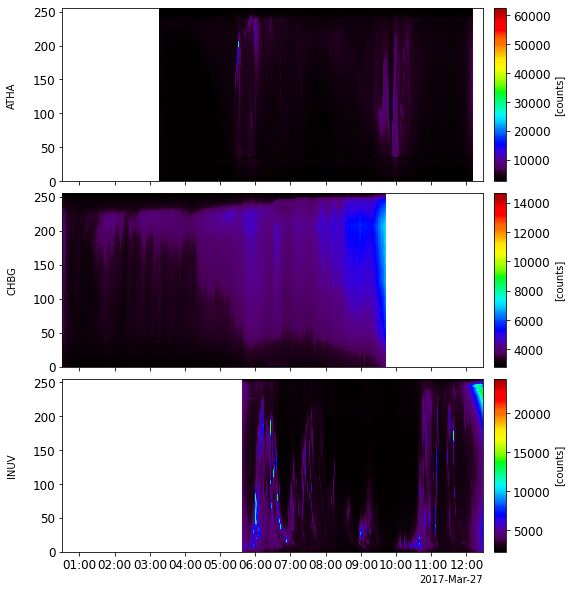

In [ ]:
tplot(['thg_ask_atha', 'thg_ask_chbg', 'thg_ask_inuv'])

## Ground magnetometer data

In [ ]:
pyspedas.themis.gmag(trange=trange)

02-Feb-22 23:32:58: Downloading remote index: http://themis.ssl.berkeley.edu/data/themis/thg/l2/mag/atha/2017/
02-Feb-22 23:32:58: File is current: themis_data/thg/l2/mag/atha/2017/thg_l2_mag_atha_20170327_v01.cdf
02-Feb-22 23:32:58: Downloading remote index: http://themis.ssl.berkeley.edu/data/themis/thg/l2/mag/chbg/2017/
02-Feb-22 23:32:59: File is current: themis_data/thg/l2/mag/chbg/2017/thg_l2_mag_chbg_20170327_v01.cdf
02-Feb-22 23:32:59: Downloading remote index: http://themis.ssl.berkeley.edu/data/themis/thg/l2/mag/ekat/2017/
02-Feb-22 23:32:59: Remote index not found: http://themis.ssl.berkeley.edu/data/themis/thg/l2/mag/ekat/2017/
02-Feb-22 23:32:59: Downloading remote index: http://themis.ssl.berkeley.edu/data/themis/thg/l2/mag/fsim/2017/
02-Feb-22 23:33:00: File is current: themis_data/thg/l2/mag/fsim/2017/thg_l2_mag_fsim_20170327_v01.cdf
02-Feb-22 23:33:00: Downloading remote index: http://themis.ssl.berkeley.edu/data/themis/thg/l2/mag/fsmi/2017/
02-Feb-22 23:33:00: File is

['thg_mag_amd',
 'thg_mag_atha',
 'thg_mag_bbg',
 'thg_mag_blc',
 'thg_mag_bou',
 'thg_mag_brn',
 'thg_mag_brw',
 'thg_mag_bsl',
 'thg_mag_cbb',
 'thg_mag_ccnv',
 'thg_mag_cdrt',
 'thg_mag_chbg',
 'thg_mag_cigo',
 'thg_mag_cmo',
 'thg_mag_crvr',
 'thg_mag_ded',
 'thg_mag_dik',
 'thg_mag_frd',
 'thg_mag_frn',
 'thg_mag_fsim',
 'thg_mag_fsmi',
 'thg_mag_fykn',
 'thg_mag_gbay',
 'thg_mag_gill',
 'thg_mag_gjoa',
 'thg_mag_gua',
 'thg_mag_han',
 'thg_mag_hon',
 'thg_mag_hris',
 'thg_mag_iglo',
 'thg_mag_inuk',
 'thg_mag_inuv',
 'thg_mag_iqa',
 'thg_mag_iva',
 'thg_mag_kako',
 'thg_mag_kev',
 'thg_mag_kian',
 'thg_mag_kil',
 'thg_mag_kjpk',
 'thg_mag_kuuj',
 'thg_mag_leth',
 'thg_mag_loz',
 'thg_mag_lrel',
 'thg_mag_mas',
 'thg_mag_mea',
 'thg_mag_mek',
 'thg_mag_muo',
 'thg_mag_nain',
 'thg_mag_new',
 'thg_mag_nur',
 'thg_mag_ott',
 'thg_mag_ouj',
 'thg_mag_pang',
 'thg_mag_pbk',
 'thg_mag_pel',
 'thg_mag_pgeo',
 'thg_mag_pina',
 'thg_mag_pokr',
 'thg_mag_puvr',
 'thg_mag_radi',
 'thg_mag_r

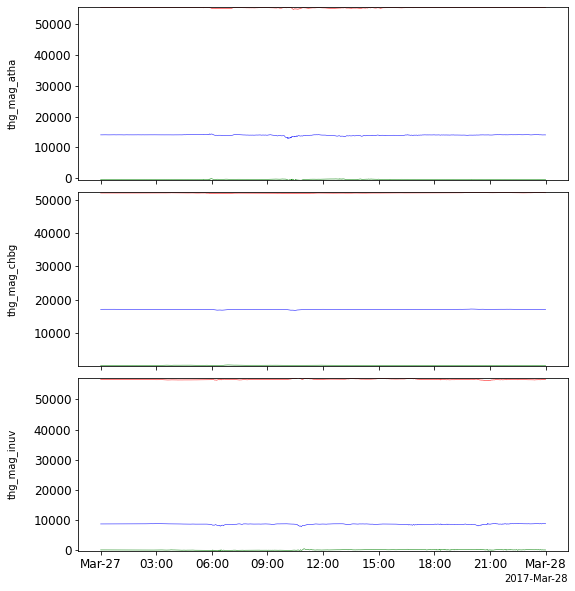

In [ ]:
tplot(['thg_mag_atha', 'thg_mag_chbg', 'thg_mag_inuv'])

Subtract the median from the ground mag data

In [ ]:
from pyspedas import subtract_median

subtract_median(['thg_mag_atha', 'thg_mag_chbg', 'thg_mag_inuv'])

thg_mag_atha copied to thg_mag_atha-m
Subtract Median was applied to: thg_mag_atha-m
thg_mag_chbg copied to thg_mag_chbg-m
Subtract Median was applied to: thg_mag_chbg-m
thg_mag_inuv copied to thg_mag_inuv-m
Subtract Median was applied to: thg_mag_inuv-m


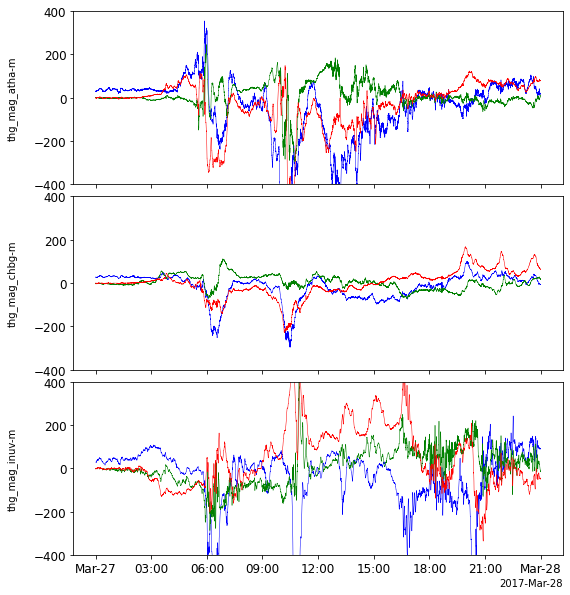

In [ ]:
options('thg_mag_atha-m', 'yrange', [-400, 400])
options('thg_mag_chbg-m', 'yrange', [-400, 400])
options('thg_mag_inuv-m', 'yrange', [-400, 400])

tplot(['thg_mag_atha-m', 'thg_mag_chbg-m', 'thg_mag_inuv-m'])

## Magnetic Induction Coil Array (MICA)

In [ ]:
nal_vars = pyspedas.mica.induction(site='NAL', trange=trange)


02-Feb-22 23:34:42: Downloading remote index: http://mirl.unh.edu/ULF/cdf/NAL/2017/03/
02-Feb-22 23:34:42: File is current: mica_data/NAL/2017/03/mica_ulf_nal_20170327_v00.cdf


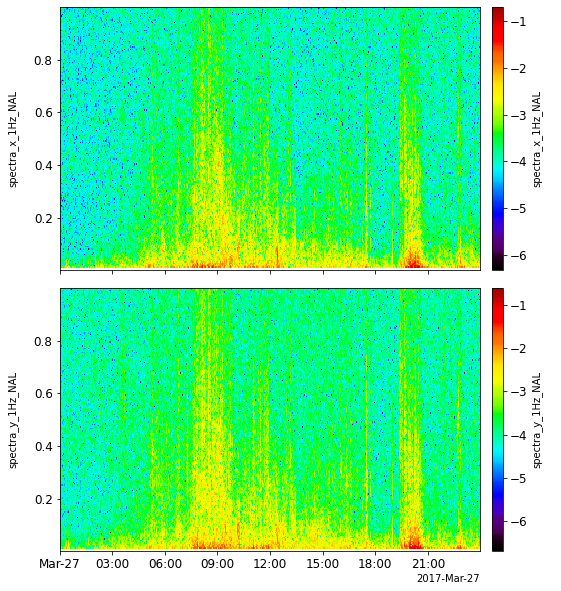

In [ ]:
tplot('spectra_?_1Hz_NAL')